# LinkedIn Job Insights Explorer

                              Introdução:

Este modelo de visualização de dados foi desenvolvido para explorar e analisar o "LinkedIn Job Postings Dataset", um conjunto de dados abrangente que contém informações sobre postagens de empregos e empresas no LinkedIn. O objetivo principal deste modelo é fornecer uma análise detalhada e atrativa dos dados, revelando insights valiosos sobre o mercado de trabalho, tendências de emprego e muito mais.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [29]:
# Carregar os conjuntos de dados
data = {
    'companies': pd.read_csv("companies.csv"),
    'benefits': pd.read_csv("benefits.csv"),
    'company_industries': pd.read_csv("company_industries.csv"),
    'job_skills': pd.read_csv("job_skills.csv"),
    'job_postings': pd.read_csv("job_postings.csv"),
    'job_industries': pd.read_csv("job_industries.csv"),
    'company_specialities': pd.read_csv("company_specialities.csv"),
    'employee_counts': pd.read_csv("employee_counts.csv"),
}

In [30]:
# Visualize as primeiras linhas de cada dataframe
for name, df in data.items():
    print(f"--- {name.upper()} ---")
    print(df.head())

--- COMPANIES ---
   company_id                        name  \
0        1009                         IBM   
1        1016               GE HealthCare   
2        1021                    GE Power   
3        1025  Hewlett Packard Enterprise   
4        1028                      Oracle   

                                         description  company_size  state  \
0  At IBM, we do more than work. We create. We cr...           7.0     NY   
1  Every day millions of people feel the impact o...           7.0      0   
2  GE Power, part of GE Vernova, is a world energ...           7.0     NY   
3  Official LinkedIn of Hewlett Packard Enterpris...           7.0  Texas   
4  We’re a cloud technology company that provides...           7.0  Texas   

  country              city zip_code                                address  \
0      US  Armonk, New York    10504  International Business Machines Corp.   
1      US           Chicago        0                                      -   
2      US  

Estatísticas Descritivas: Calcula estatísticas descritivas para os dados numéricos em cada dataframe. Isso ajuda a entender as características centrais dos dados, como média, mediana e desvio padrão.

In [31]:
# Visualize as estatísticas descritivas dos dados numéricos
for name, df in data.items():
    if df.select_dtypes(include=['number']).shape[1] > 0:
        print(f"--- {name.upper()} Descriptive Statistics ---")
        print(df.describe())

--- COMPANIES Descriptive Statistics ---
         company_id  company_size
count  6.063000e+03   5474.000000
mean   6.669791e+07      3.764706
std    4.276660e+08      2.057414
min    1.009000e+03      1.000000
25%    9.488450e+04      2.000000
50%    2.174958e+06      4.000000
75%    1.834672e+07      5.000000
max    3.700153e+09      7.000000
--- BENEFITS Descriptive Statistics ---
             job_id      inferred
count  1.376100e+04  13761.000000
mean   3.688737e+09      0.480343
std    1.269467e+08      0.499632
min    8.500877e+07      0.000000
25%    3.693059e+09      0.000000
50%    3.694119e+09      0.000000
75%    3.699407e+09      1.000000
max    3.701374e+09      1.000000
--- COMPANY_INDUSTRIES Descriptive Statistics ---
         company_id
count  1.588000e+04
mean   1.072469e+07
std    2.274282e+07
min    1.009000e+03
25%    1.338600e+04
50%    3.474100e+05
75%    9.308035e+06
max    9.856222e+07
--- JOB_SKILLS Descriptive Statistics ---
             job_id
count  2.789900

In [32]:
# Preencher valores ausentes com a mediana para DataFrames numéricos
for name, df in data.items():
    numeric_columns = df.select_dtypes(include=['number']).columns
    df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# Verificar se os valores ausentes foram corrigidos
for name, df in data.items():
    print(f"--- {name.upper()} ---")
    print(df.isnull().sum())

--- COMPANIES ---
company_id       0
name             0
description     64
company_size     0
state            3
country          0
city             0
zip_code         8
address          5
url              0
dtype: int64
--- BENEFITS ---
job_id      0
inferred    0
type        0
dtype: int64
--- COMPANY_INDUSTRIES ---
company_id    0
industry      0
dtype: int64
--- JOB_SKILLS ---
job_id       0
skill_abr    0
dtype: int64
--- JOB_POSTINGS ---
job_id                            0
company_id                        0
title                             0
description                       1
max_salary                        0
med_salary                        0
min_salary                        0
pay_period                     9384
formatted_work_type               0
location                          0
applies                           0
original_listed_time              0
remote_allowed                    0
views                             0
job_posting_url                   0
application_

Distribuição de Salários: Gera um gráfico de distribuição de salários em anúncios de emprego, mostrando a frequência dos salários máximos, médios e mínimos. Isso fornece insights sobre os padrões salariais no conjunto de dados.

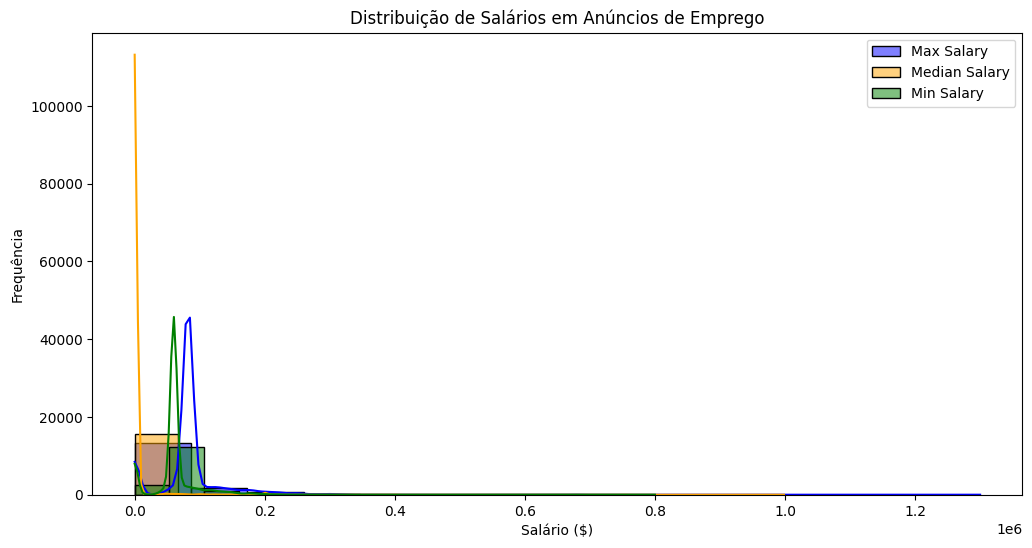

In [34]:
# Visualize a distribuição de salários nos anúncios de emprego
plt.figure(figsize=(12, 6))
sns.histplot(data['job_postings']['max_salary'].dropna(), kde=True, color='blue', label='Max Salary')
sns.histplot(data['job_postings']['med_salary'].dropna(), kde=True, color='orange', label='Median Salary')
sns.histplot(data['job_postings']['min_salary'].dropna(), kde=True, color='green', label='Min Salary')
plt.title('Distribuição de Salários em Anúncios de Emprego')
plt.xlabel('Salário ($)')
plt.ylabel('Frequência')
plt.legend()
plt.show()

Distribuição do Tamanho das Empresas: Cria um gráfico de contagem para visualizar a distribuição do tamanho das empresas. Isso ajuda a entender a diversidade de empresas presentes nos dados.

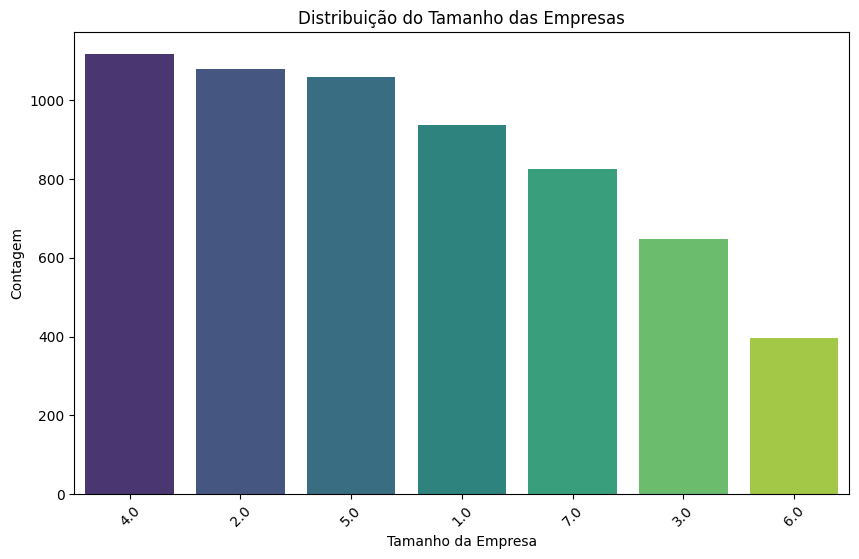

In [35]:
# Visualize a distribuição do tamanho das empresas
plt.figure(figsize=(10, 6))
sns.countplot(x='company_size', data=data['companies'], order=data['companies']['company_size'].value_counts().index, palette='viridis')
plt.title('Distribuição do Tamanho das Empresas')
plt.xlabel('Tamanho da Empresa')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

Principais Indústrias das Empresas: Apresenta as 10 principais indústrias com mais empresas no LinkedIn. Isso permite identificar quais setores têm maior presença na plataforma.

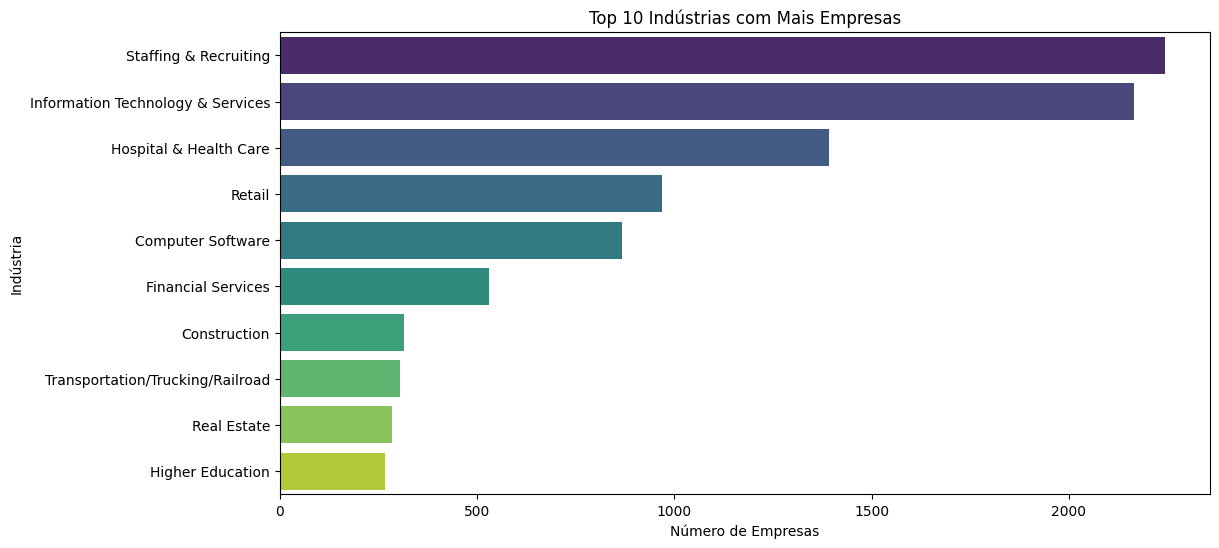

In [36]:
# Visualize as 10 principais indústrias com mais empresas
top_industries_companies = data['company_industries']['industry'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_industries_companies.values, y=top_industries_companies.index, palette='viridis')
plt.title('Top 10 Indústrias com Mais Empresas')
plt.xlabel('Número de Empresas')
plt.ylabel('Indústria')
plt.show()

Principais Indústrias com Mais Anúncios de Emprego: Mostra as 10 principais indústrias com mais anúncios de emprego. Isso pode ajudar na compreensão das áreas que estão contratando mais.

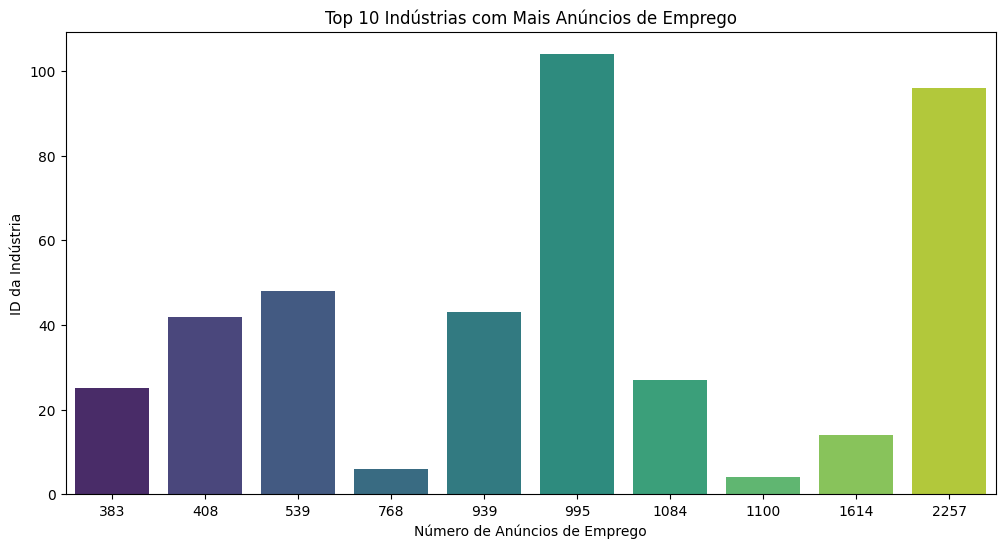

In [37]:
# Visualize as 10 principais indústrias com mais anúncios de emprego
top_industries_jobs = data['job_industries']['industry_id'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_industries_jobs.values, y=top_industries_jobs.index, palette='viridis')
plt.title('Top 10 Indústrias com Mais Anúncios de Emprego')
plt.xlabel('Número de Anúncios de Emprego')
plt.ylabel('ID da Indústria')
plt.show()

Principais Habilidades Mais Requisitadas: Exibi as 10 habilidades mais requisitadas em anúncios de emprego. Isso pode ser útil para profissionais que desejam entender quais habilidades são mais demandadas.

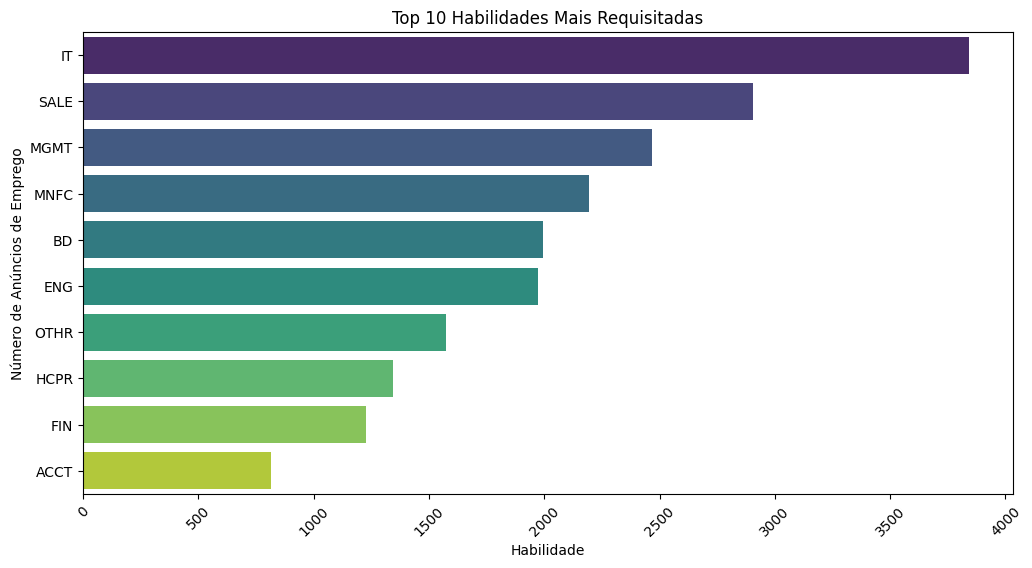

In [38]:
# Visualize as 10 principais habilidades mais requisitadas
top_skills = data['job_skills']['skill_abr'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_skills.values, y=top_skills.index, palette='viridis')
plt.title('Top 10 Habilidades Mais Requisitadas')
plt.xlabel('Habilidade')
plt.ylabel('Número de Anúncios de Emprego')
plt.xticks(rotation=45)
plt.show()

Principais Especialidades das Empresas: Apresenta as 10 especialidades mais comuns das empresas. Isso fornece informações sobre os tipos de empresas presentes nos dados.

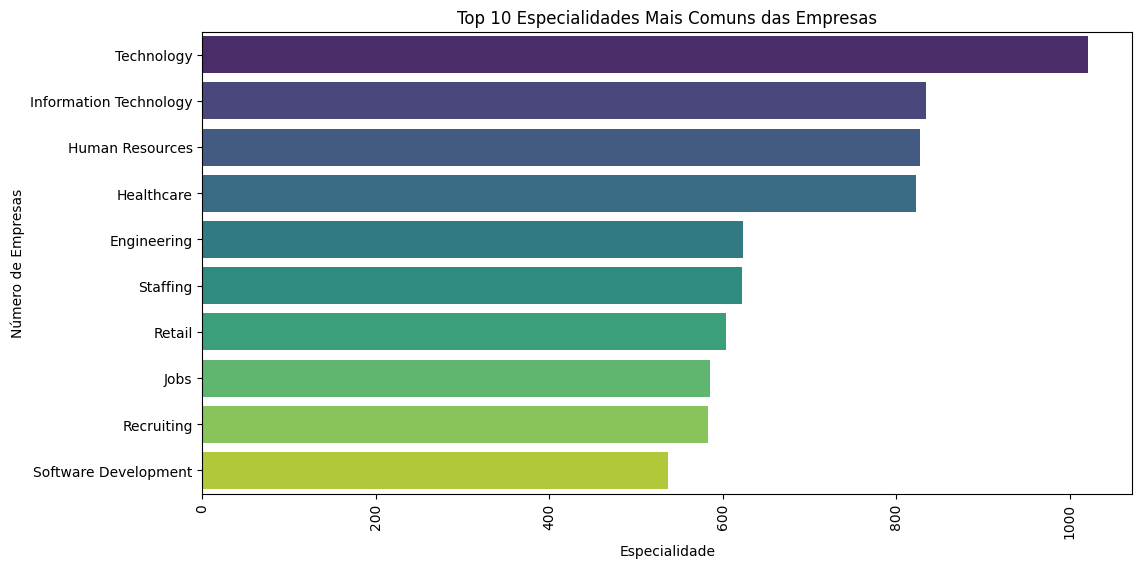

In [39]:
# Visualize as 10 principais especialidades mais comuns das empresas
top_specialities = data['company_specialities']['speciality'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_specialities.values, y=top_specialities.index, palette='viridis')
plt.title('Top 10 Especialidades Mais Comuns das Empresas')
plt.xlabel('Especialidade')
plt.ylabel('Número de Empresas')
plt.xticks(rotation=90)
plt.show()

Principais Localizações com Mais Anúncios de Emprego: Visualiza as 10 principais localizações com mais anúncios de emprego, o que pode ser útil para profissionais que buscam empregos em regiões específicas.

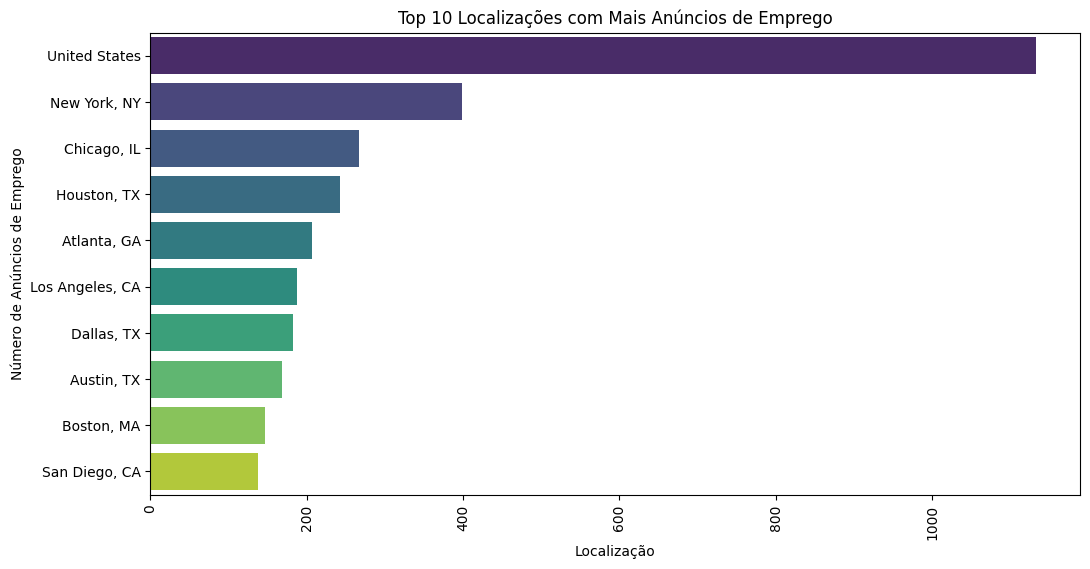

In [40]:
# Visualize as 10 principais localizações com mais anúncios de emprego
top_locations = data['job_postings']['location'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette='viridis')
plt.title('Top 10 Localizações com Mais Anúncios de Emprego')
plt.xlabel('Localização')
plt.ylabel('Número de Anúncios de Emprego')
plt.xticks(rotation=90)
plt.show()

Filtragem por Título de Emprego Relacionado a Tecnologia da Informação: Realiza uma filtragem para identificar títulos de emprego relacionados à tecnologia da informação e geramos uma nuvem de palavras específica para esses títulos.

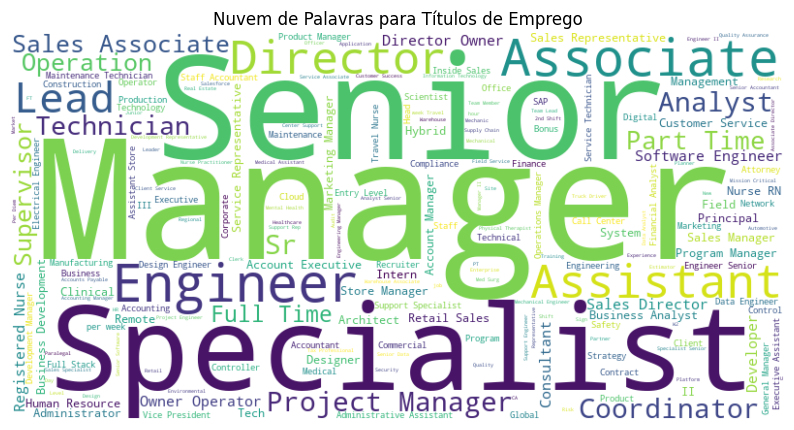

In [41]:
# Gere uma nuvem de palavras para os títulos de emprego
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['job_postings']['title'].astype(str)))
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras para Títulos de Emprego')
plt.show()

Nuvem de Palavras para Títulos de Emprego e Descrições: Gera nuvens de palavras para os títulos e descrições de emprego. Isso ajuda na identificação de palavras-chave e termos frequentes nos anúncios de emprego.

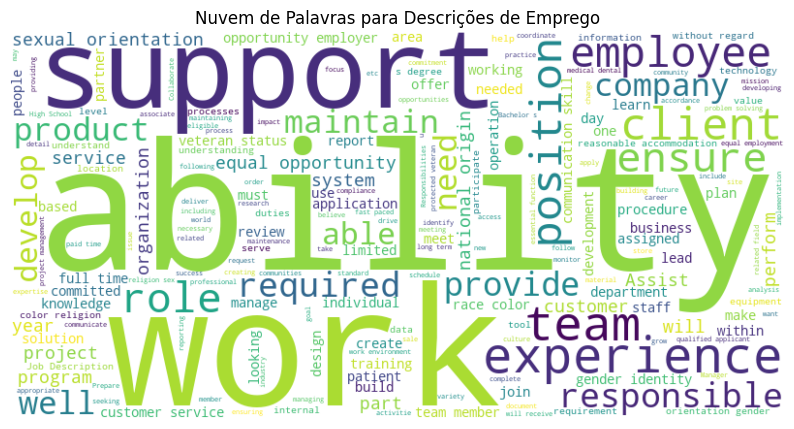

In [42]:
# Gere uma nuvem de palavras para as descrições de emprego
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['job_postings']['description'].astype(str)))
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras para Descrições de Emprego')
plt.show()

Filtragem por Títulos de Emprego em Information Technology e Data: Filtra títulos de emprego relacionados a "Information Technology" e "Data" e gera uma nuvem de palavras para esses títulos.

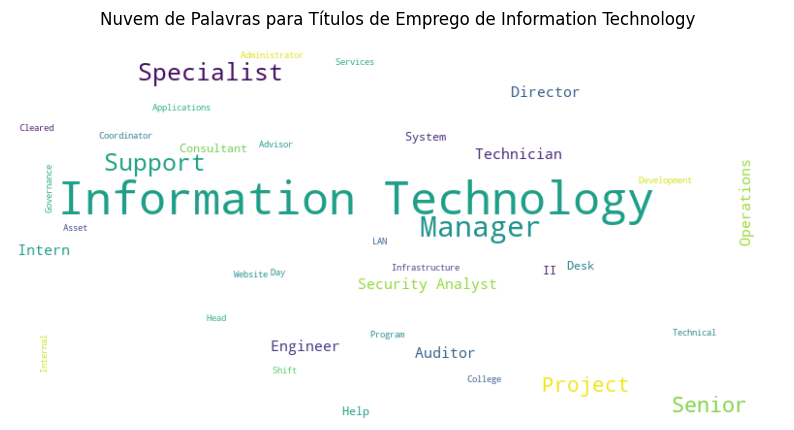

In [43]:

# Filtrar os títulos de emprego relacionados a "information technology"
it_jobs = job_postings[job_postings['title'].str.lower().str.contains('information technology', na=False)]

# Juntar os títulos de emprego em uma única string
it_job_titles = ' '.join(it_jobs['title'].astype(str))

# Gerar a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(it_job_titles)

# Exibir a nuvem de palavras
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras para Títulos de Emprego de Information Technology')
plt.show()

Filtragem por Títulos de Emprego em Information Technology e Data: Filtra títulos de emprego relacionados a "Information Technology" e "Data" e gera uma nuvem de palavras para esses títulos.

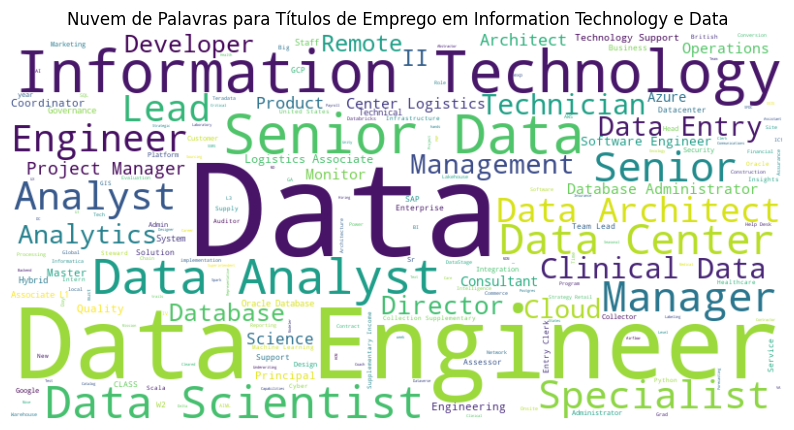

In [44]:

# Filtrar as postagens de emprego relacionadas a "Information Technology" e "Data"
filtered_jobs = job_postings[job_postings['title'].str.contains('Information Technology|Data', case=False, regex=True)]

# Concatenar os títulos de emprego filtrados em uma única string
job_titles = ' '.join(filtered_jobs['title'].astype(str))

# Gerar a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(job_titles)

# Plotar a nuvem de palavras
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras para Títulos de Emprego em Information Technology e Data')
plt.show()

Filtragem por Vagas de Data Science: Filtra vagas específicas de Data Science e cria nuvens de palavras tanto para os títulos quanto para as descrições dessas vagas.

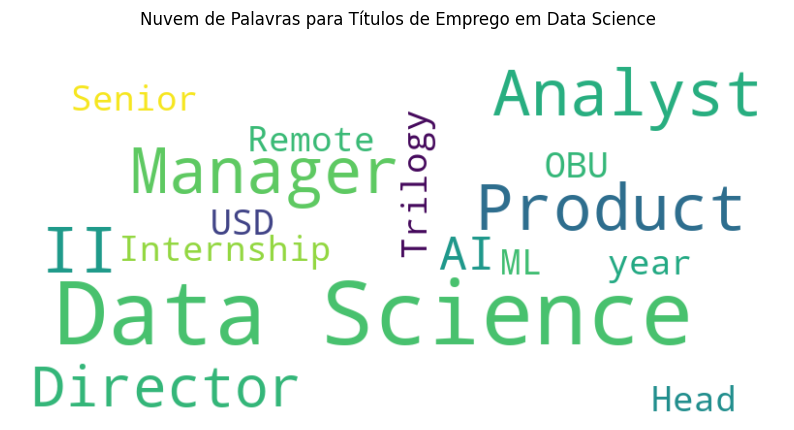

In [46]:
# Filtrar apenas vagas relacionadas a Data Science
data_science_jobs = job_postings[job_postings['title'].str.lower().str.contains('data science', na=False)]

# Obter os títulos de emprego relevantes
job_titles = ' '.join(data_science_jobs['title'].astype(str))

# Gerar uma nuvem de palavras para os títulos de emprego
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(job_titles)

# Plotar a nuvem de palavras
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras para Títulos de Emprego em Data Science')
plt.show()




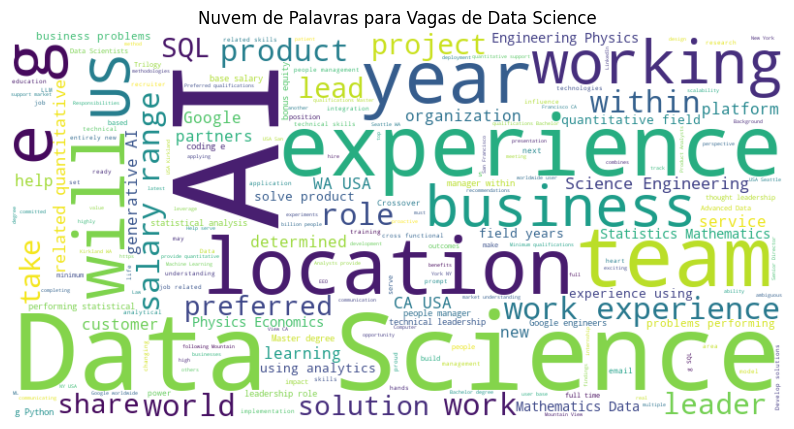

In [47]:
# Filtrar apenas as vagas de Data Science
data_sci_jobs = job_postings[job_postings['title'].str.lower().str.contains('data science', na=False)]

# Juntar as descrições de empregos em uma única string
data_sci_descriptions = ' '.join(data_sci_jobs['description'].astype(str))

# Gerar a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(data_sci_descriptions)

# Plotar a nuvem de palavras
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras para Vagas de Data Science')
plt.show()

# Conclusão:

Este modelo de visualização de dados oferece uma abordagem abrangente e detalhada para explorar o conjunto de dados "LinkedIn Job Postings". Ao longo do processo, foi examinado  informações cruciais sobre empresas, empregos e habilidades, além de identificar tendências importantes no mercado de trabalho. As nuvens de palavras fornecem uma representação visual impactante dos títulos e descrições de emprego, destacando os termos mais relevantes.

Essas análises e visualizações são valiosas para candidatos a emprego, empregadores e analistas de mercado, fornecendo insights acionáveis que podem orientar decisões relacionadas à carreira, contratações e estratégias de negócios. Este modelo pode ser adaptado e expandido ainda mais para atender a necessidades específicas de análise de dados no contexto do LinkedIn Job Postings Dataset.